# MELTS
  
Versions of MELTS implemented are:  
- MELTS v. 1.0.2 ➞ (rhyolite-MELTS, Gualda et al., 2012)  
- MELTS v. 1.1.0 ➞ (rhyolite-MELTS + new CO<sub>2</sub>, works at the ternary minimum)  
- MELTS v. 1.2.0 ➞ (rhyolite-MELTS + new H<sub>2</sub>O + new CO<sub>2</sub>)  
- pMELTS v. 5.6.1

## Initialize tools and packages that are required to execute this notebook.

In [1]:
from thermoengine import equilibrate
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Create a MELTS v 1.0.2 instance.
Rhyolite-MELTS version 1.0.2 is the default model.

In [2]:
melts = equilibrate.MELTSmodel()

### Optional: Generate some information about the implemented model.

In [3]:
oxides = melts.get_oxide_names()
phases = melts.get_phase_names()
#print (oxides)
#print (phases)

## Required: Input initial composition of the system (liquid), in wt% or grams of oxides. 
Mid-Atlantic ridge MORB composition

In [4]:
feasible = melts.set_bulk_composition({'SiO2':  48.68, 
                                       'TiO2':   1.01, 
                                       'Al2O3': 17.64, 
                                       'Fe2O3':  0.89,
                                       'Cr2O3':  0.0425, 
                                       'FeO':    7.59, 
                                       'MnO':    0.0,
                                       'MgO':    9.10, 
                                       'NiO':    0.0, 
                                       'CoO':    0.0,
                                       'CaO':   12.45, 
                                       'Na2O':   2.65, 
                                       'K2O':    0.03, 
                                       'P2O5':   0.08, 
                                       'H2O':    0.2})

## Optional: Suppress phases that are not required in the simulation.

In [5]:
b = melts.get_phase_inclusion_status()
melts.set_phase_inclusion_status({'Nepheline':False, 'OrthoOxide':False})
a = melts.get_phase_inclusion_status()
for phase in b.keys():
    if b[phase] != a[phase]:
        print ("{0:<15s} Before: {1:<5s} After: {2:<5s}".format(phase, repr(b[phase]), repr(a[phase])))

Nepheline       Before: True  After: False
OrthoOxide      Before: True  After: False


## Compute the equilibrium state at some specified T (°C) and P (MPa).
Print status of the calculation.

In [6]:
output = melts.equilibrate_tp(1370.0, 1000.0, initialize=True)
(status, t, p, xmlout) = output[0]
print (status, t, p)

success, Trivial case with no quadratic search. 1370.0 1000.0


In [7]:
s = melts.get_property_of_phase(xmlout,'System', 'Entropy')
print ("{0:<20s} {1:13.6e} {2:<10s}".format('Entropy', s, melts.get_units_of_property('Entropy')))

Entropy               2.844723e+02 J/K       


### Summary output of equilibrium state ...

In [8]:
melts.output_summary(xmlout)
dict = melts.get_dictionary_of_affinities(xmlout, sort=True)
for phase in dict:
    (affinity, formulae) = dict[phase]
    if affinity < 10000.0:
        print ("{0:<20s} {1:10.2f} {2:<60s}".format(phase, affinity, formulae))

T (°C)      1370.00
P (MPa)     1000.00
Liquid          100.3625 (g)  wt %:SiO2 48.50 TiO2  1.01 Al2O3 17.58 Fe2O3  0.89 Cr2O3  0.04 FeO  7.56 MnO  0.00
                                  MgO  9.07 NiO  0.00 CoO  0.00 CaO 12.40 Na2O  2.64 K2O  0.03 P2O5  0.08 H2O 
Spinel                   449.99 Fe''1.00Mg-0.00Fe'''-0.00Al2.00Cr-0.00Ti-0.00O4             
Augite                  1404.92 Na-0.00Ca0.00Fe''-0.00Mg2.00Fe'''-0.00Ti-0.00Al-0.00Si2.00O6
Orthopyroxene           1841.20 Na-0.00Ca0.00Fe''-0.00Mg2.00Fe'''-0.00Ti-0.00Al-0.00Si2.00O6
Olivine                 4597.32 (Ca-0.00Mg0.00Fe''1.00Mn0.00Co0.00Ni0.00)2SiO4              
Plagioclase             7103.07 K0.00Na-0.00Ca1.00Al2.00Si2.00O8                            
Forsterite              8377.04 Mg2SiO4                                                     
Quartz                  8940.01 SiO2                                                        


### Obtain default set of fractionation coefficients (retain liquids, fractionate solids and fluids)

In [9]:
frac_coeff = melts.get_dictionary_of_default_fractionation_coefficients(fracLiq=0, fracSolid=1)
print (frac_coeff)

{'Actinolite': 1.0, 'Aegirine': 1.0, 'Aenigmatite': 1.0, 'Akermanite': 1.0, 'Andalusite': 1.0, 'Anthophyllite': 1.0, 'Apatite': 1.0, 'Augite': 1.0, 'Biotite': 1.0, 'Chromite': 1.0, 'Coesite': 1.0, 'Corundum': 1.0, 'Cristobalite': 1.0, 'Cummingtonite': 1.0, 'Fayalite': 1.0, 'Forsterite': 1.0, 'Garnet': 1.0, 'Gehlenite': 1.0, 'Hematite': 1.0, 'Hornblende': 1.0, 'Ilmenite': 1.0, 'Ilmenite ss': 1.0, 'Kalsilite': 1.0, 'Kalsilite ss': 1.0, 'Kyanite': 1.0, 'Leucite': 1.0, 'Lime': 1.0, 'Liquid': 0.0, 'Liquid Alloy': 1.0, 'Magnetite': 1.0, 'Melilite': 1.0, 'Muscovite': 1.0, 'Nepheline': 1.0, 'Nepheline ss': 1.0, 'Olivine': 1.0, 'OrthoOxide': 1.0, 'Orthopyroxene': 1.0, 'Panunzite': 1.0, 'Periclase': 1.0, 'Perovskite': 1.0, 'Phlogopite': 1.0, 'Pigeonite': 1.0, 'Plagioclase': 1.0, 'Quartz': 1.0, 'Rutile': 1.0, 'Sanidine': 1.0, 'Sillimanite': 1.0, 'Solid Alloy': 1.0, 'Sphene': 1.0, 'Spinel': 1.0, 'Titanaugite': 1.0, 'Tridymite': 1.0, 'Water': 1.0, 'Whitlockite': 1.0}


## Run the sequence of calculations along a T, P=constant path:
Output is sent to an Excel file and plotted in the notebook

In [10]:
# number_of_steps = 40
# t_increment_of_steps = -5.0
# p_increment_of_steps = 0.0

# plotOxides = ['SiO2', 'FeO', 'MgO', 'CaO', 'Na2O']
# # matplotlib colors b : blue, g : green, r : red, c : cyan, m : magenta, y : yellow, k : black, w : white.
# plotColors = [ 'ro', 'bo', 'go', 'co', 'mo']

# wb = melts.start_excel_workbook_with_sheet_name(sheetName="Summary")
# melts.update_excel_workbook(wb, xmlout)

# n = len(plotOxides)
# xPlot = np.zeros(number_of_steps+1)
# yPlot = np.zeros((n, number_of_steps+1))
# xPlot[0] = t
# for i in range (0, n):
#     oxides = melts.get_composition_of_phase(xmlout, 'Liquid')
#     yPlot[i][0] = oxides[plotOxides[i]]

# plt.ion()
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.set_xlim([min(t, t+t_increment_of_steps*number_of_steps), max(t, t+t_increment_of_steps*number_of_steps)])
# ax.set_ylim([0., 100.])
# graphs = []
# for i in range (0, n):
#     graphs.append(ax.plot(xPlot, yPlot[i], plotColors[i]))
# handle = []
# for (graph,) in graphs:
#     handle.append(graph)
# ax.legend(handle, plotOxides, loc='upper left')

# for i in range (1, number_of_steps):
#     # fractionate phases
#     frac_output = melts.fractionate_phases(xmlout, frac_coeff)
#     output = melts.equilibrate_tp(t+t_increment_of_steps, p+p_increment_of_steps, initialize=True)
#     (status, t, p, xmlout) = output[0]
#     print ("{0:<30s} {1:8.2f} {2:8.2f}".format(status, t, p))

#     s = melts.get_property_of_phase(xmlout,'System', 'Entropy')
#     print ("{0:<20s} {1:13.6e} {2:<10s}".format('Entropy', s, melts.get_units_of_property('Entropy')))

#     xPlot[i] = t
#     for j in range (0, n):
#         oxides = melts.get_composition_of_phase(xmlout, 'Liquid')
#         yPlot[j][i] = oxides[plotOxides[j]]
#     j = 0
#     for (graph,) in graphs:
#         graph.set_xdata(xPlot)
#         graph.set_ydata(yPlot[j])
#         j = j + 1
#     fig.canvas.draw()
#     melts.update_excel_workbook(wb, xmlout)

# melts.write_excel_workbook(wb, "MELTSv102summary.xlsx")

## Now I will try to run this under isentropic conditions.

Entropy               2.844723e+02 J/K       
success, Trivial case with no quadratic search.  1369.27   975.00
Entropy               2.844723e+02 J/K       
success, Trivial case with no quadratic search.  1368.54   950.00
Entropy               2.844723e+02 J/K       
success, Trivial case with no quadratic search.  1367.81   925.00
Entropy               2.844723e+02 J/K       
success, Trivial case with no quadratic search.  1367.08   900.00
Entropy               2.844723e+02 J/K       
success, Trivial case with no quadratic search.  1366.35   875.00
Entropy               2.844723e+02 J/K       
success, Trivial case with no quadratic search.  1365.62   850.00
Entropy               2.844723e+02 J/K       
success, Trivial case with no quadratic search.  1364.89   825.00
Entropy               2.844723e+02 J/K       
success, Trivial case with no quadratic search.  1364.17   800.00
Entropy               2.844723e+02 J/K       
success, Trivial case with no quadratic search.  1363.44  

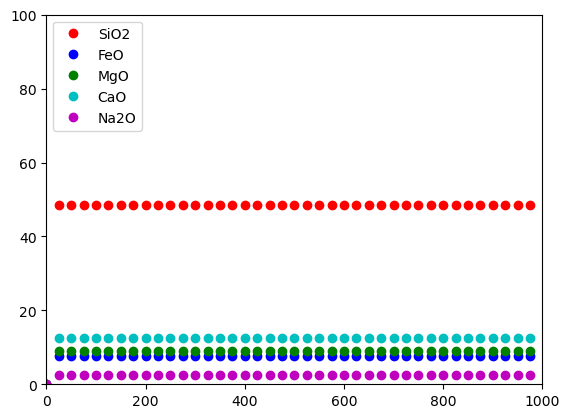

In [11]:
number_of_steps = 40
t_increment_of_steps = 0.0
p_increment_of_steps = -25.0

plotOxides = ['SiO2', 'FeO', 'MgO', 'CaO', 'Na2O']
# matplotlib colors b : blue, g : green, r : red, c : cyan, m : magenta, y : yellow, k : black, w : white.
plotColors = [ 'ro', 'bo', 'go', 'co', 'mo']

wb = melts.start_excel_workbook_with_sheet_name(sheetName="Summary")
melts.update_excel_workbook(wb, xmlout)

n = len(plotOxides)
xPlot = np.zeros(number_of_steps+1)
yPlot = np.zeros((n, number_of_steps+1))
xPlot[0] = t
for i in range (0, n):
    oxides = melts.get_composition_of_phase(xmlout, 'Liquid')
    yPlot[i][0] = oxides[plotOxides[i]]

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([min(p, p+p_increment_of_steps*number_of_steps), max(p, p+p_increment_of_steps*number_of_steps)])
ax.set_ylim([0., 100.])
graphs = []
for i in range (0, n):
    graphs.append(ax.plot(xPlot, yPlot[i], plotColors[i]))
handle = []
for (graph,) in graphs:
    handle.append(graph)
ax.legend(handle, plotOxides, loc='upper left')

for i in range (1, number_of_steps):
    # fractionate phases
    frac_output = melts.fractionate_phases(xmlout, frac_coeff)
    s = melts.get_property_of_phase(xmlout,'System', 'Entropy')
    print ("{0:<20s} {1:13.6e} {2:<10s}".format('Entropy', s, melts.get_units_of_property('Entropy')))
    # output = melts.equilibrate_tp(t+t_increment_of_steps, p+p_increment_of_steps, initialize=True)
    output = melts.equilibrate_sp(s, p+p_increment_of_steps, initialize=True)
    (status, t, p, xmlout) = output[0]
    print ("{0:<30s} {1:8.2f} {2:8.2f}".format(status, t, p))

    # s = melts.get_property_of_phase(xmlout,'System', 'Entropy')
    # print ("{0:<20s} {1:13.6e} {2:<10s}".format('Entropy', s, melts.get_units_of_property('Entropy')))

    xPlot[i] = p
    for j in range (0, n):
        oxides = melts.get_composition_of_phase(xmlout, 'Liquid')
        yPlot[j][i] = oxides[plotOxides[j]]
    j = 0
    for (graph,) in graphs:
        graph.set_xdata(xPlot)
        graph.set_ydata(yPlot[j])
        j = j + 1
    fig.canvas.draw()
    melts.update_excel_workbook(wb, xmlout)

melts.write_excel_workbook(wb, "MELTSv102summary.xlsx")